In [1]:
import os
import pandas as pd
from datetime import datetime
import torch
import torch.nn as nn
import torch.optim as optim
import _0_process_data

**Set directories**

In [2]:
project_dir = "/home/jupyter-tfg2425paula/prediction_project_v2"
os.chdir(project_dir)

raw_data_dir = os.path.join(project_dir, "_00_data_raw")
transformed_data_dir = os.path.join(project_dir, "_01_data_transformed")
structured_data_dir = os.path.join(project_dir, "_02_data_structured")

from _0_process_data._00_preprocess_data import preprocess_data
from _0_process_data._00_preprocess_data import appropiate_date_format
from _0_process_data._00_preprocess_data import create_return_column

## **1. Data** 

This part of the code structures the process of data loading. At the moment, standardized for:

    - Single names
    - Single names with technical indicators
    - PCA dataframes

Parameters in this part of the code:

    - 0. Data filepath
    - 1. Stock(s)
    - 2. Type of data (Technical / Economic / Options)
    - 3. Start and end date (number of values)
    - 4. Scaling method (standard, minmax or none)
    - 5. Processing method (PCA or none)
    - 6. Window size for generated dataframes. 

**Set parameters**

In [3]:
stock = 'SPX'
data_type = "stock_technical_ind"

# standard, minmax or None
scaling_method = "standard"
processing_method = None
evaluation_metric = "rolling"

**Load raw data**

In [4]:
if data_type == "stock_single_name":

    securities = "single_names"
    stocks_folder = os.path.join(raw_data_dir, securities)
    
    filename = f'{stock}_Close.csv'

    df = pd.read_csv(os.path.join(stocks_folder, filename), sep=";", decimal=",")
    df

**If single names: clean, remove outliers and scale loaded data**

In [5]:
if data_type == "stock_single_name":
    clean_stocks_folder = os.path.join(raw_data_dir, 'cleaned_'+ str(securities))

    date_col_name = "Date"
    target_col_name = "Close"
    return_col = "Return"

    # standard, minmax or None
    scaling_method = "standard"

    # Only if date_format is not appropiate
    df = appropiate_date_format(df, date_col_name, date_format="%d/%m/%y")
    df = create_return_column(df, target_col_name, remove_close=True)

    selected_na_cols = list(df.columns)
    selected_scale_cols = list(df.drop(columns=[date_col_name]).columns) # All but Date

    df_clean = preprocess_data(df, selected_na_cols, return_col, selected_scale_cols, scaling_method)
    df_clean.to_csv(os.path.join(clean_stocks_folder, filename), index=False)
    
    start_date = df_clean['Date'].iloc[0]
    end_date = df_clean['Date'].iloc[-1]
    
    df_clean.head()

**If technical indicator type**

In [6]:
if data_type == "stock_technical_ind":
    
    start_date = '2010-01-01'
    end_date = '2024-11-01'
    
    from _0_process_data._01_incorporate_technical_indicators import generate_technical_ind_dataset
    technical_ind_folder = os.path.join(transformed_data_dir, 'technical')
    filename = 'technical_' + str(stock) + '.csv'
    
    target_col_name = "Close"
    date_col_name = "Date"
    return_col = "Return"
    
    # start and end date in format 2024-11-13, '%Y-%m-%d'
    technical_ind_df = generate_technical_ind_dataset(stock, start_date, end_date)
    df = create_return_column(technical_ind_df, target_col_name, remove_close=False)
    
    selected_na_cols = list(df.columns)
    selected_scale_cols = list(df.drop(columns=[date_col_name]).columns) # All but Date

    df_clean = preprocess_data(df, selected_na_cols, return_col, selected_scale_cols, scaling_method)
    df_clean.head()
    
    df_clean.to_csv(os.path.join(technical_ind_folder, filename), index=False)

[*********************100%***********************]  1 of 1 completed
/home/jupyter-tfg2425paula/prediction_project_v2/_0_process_data/_00_preprocess_data.py:53: FutureWarning: The 'fill_method' keyword being not None and the 'limit' keyword in Series.pct_change are deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["Return"] = df[target_col_name].pct_change(fill_method="pad") * 100


Missing values in each selected column before handling:
Price
Date             0
Adj Close        0
Close            0
High             0
Low              0
                ..
momentum_kama    0
others_dr        0
others_dlr       0
others_cr        0
Return           1
Length: 94, dtype: int64

Rows with missing values in the selected columns:
Price       Date  Adj Close    Close     High      Low     Open  Volume  \
122   2010-07-14    0.24983  0.24983  0.24983  0.24983  0.24983    8606   

Price     volume_adi  volume_obv  volume_cmf  ...  momentum_ppo_signal  \
122    183255.246712     6360427    0.057912  ...            29.347365   

Price  momentum_ppo_hist  momentum_pvo  momentum_pvo_signal  \
122            18.938208    -27.521253            -5.787243   

Price  momentum_pvo_hist  momentum_kama  others_dr  others_dlr   others_cr  \
122            -21.73401       0.204269  11.109626   10.534715  384.260507   

Price  Return  
122       NaN  

[1 rows x 94 columns]

Missing value

In [26]:
if data_type == "stock_technical_ind":
    
    start_date = '2010-01-01'
    end_date = '2024-11-01'
    
    from _0_process_data._01_incorporate_technical_indicators import generate_technical_ind_dataset
    technical_ind_folder = os.path.join(transformed_data_dir, 'technical')
    filename = 'technical_' + str(stock) + '.csv'
    
    target_col_name = "Close"
    date_col_name = "Date"
    return_col = "Return"
    
    # start and end date in format 2024-11-13, '%Y-%m-%d'
    technical_ind_df = generate_technical_ind_dataset(stock, start_date, end_date)


[*********************100%***********************]  1 of 1 completed


In [28]:
df

Price,Date,Adj Close,Close,High,Low,Open,Volume,volume_adi,volume_obv,volume_cmf,...,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,Return
122,2010-07-14,0.24983,0.24983,0.24983,0.24983,0.24983,8606,1.832552e+05,6360427,0.057912,...,29.347365,18.938208,-27.521253,-5.787243,-21.734010,0.204269,11.109626,10.534715,384.260507,NaN
123,2010-07-15,0.24983,0.24983,0.24983,0.24983,0.24983,3602,1.832552e+05,6364029,0.108695,...,32.858877,14.046049,-33.424322,-11.314658,-22.109663,0.211888,0.000000,0.000000,384.260507,0.000000
124,2010-07-19,0.03714,0.03714,0.03714,0.03714,0.03714,38769,1.832552e+05,6325260,0.065698,...,33.499889,2.564047,-35.154307,-16.082588,-19.071718,0.211124,-85.133890,-190.608608,-28.009302,-85.133890
125,2010-07-20,0.24983,0.24983,0.24983,0.24983,0.24983,4003,1.832552e+05,6329263,0.065614,...,34.206057,2.824672,-40.290879,-20.924246,-19.366632,0.213051,572.670944,190.608608,384.260507,572.670944
126,2010-07-21,0.04282,0.04282,0.04282,0.04179,0.04179,53502,2.367572e+05,6275761,0.189441,...,32.861904,-5.376613,-39.013132,-24.542023,-14.471109,0.212265,-82.860345,-176.377539,-16.999419,-82.860345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,2018-01-24,0.05500,0.05500,0.05500,0.05500,0.05500,7000,-3.719002e+07,173458527,0.277038,...,9.081971,0.126806,0.741691,7.910342,-7.168651,0.050643,0.000000,0.000000,6.609809,0.000000
2012,2018-01-25,0.05500,0.05500,0.05500,0.05500,0.05500,1160,-3.719002e+07,173459687,0.276780,...,9.000517,-0.325815,-7.771069,4.774060,-12.545129,0.050950,0.000000,0.000000,6.609809,0.000000
2013,2018-01-26,0.05000,0.05000,0.05000,0.05000,0.05000,1800,-3.719002e+07,173457887,0.315181,...,8.682544,-1.271892,-15.419817,0.735284,-16.155101,0.050823,-9.090907,-9.531016,-3.081990,-9.090907
2014,2018-01-29,0.05000,0.05000,0.06000,0.05000,0.06000,60817,-3.725084e+07,173518704,0.249026,...,8.213336,-1.876834,-12.175545,-1.846882,-10.328664,0.050765,0.000000,0.000000,-3.081990,0.000000


**Separate features and target df**

In [7]:
target_df = df_clean['Target']
features_df = df_clean.drop(columns = ["Date", "Target"])
df_clean = df_clean.drop(columns = ["Date"]) # date must be removed in any case

**Combine loaded data (if desired) or transform data**

If you want to **perform PCA**

In [8]:
horizontal_filename = filename[:-4]
final_df = df_clean
if processing_method == "pca":
    from _0_process_data._01_pca import generate_rotated_pca_df
    pca_data_dir = os.path.join(transformed_data_dir, "pca")
    pca_df = generate_rotated_pca_df(features_df, target_df)
    final_df = pca_df

    pca_filename = 'pca_' + str(filename)
    horizontal_filename = pca_filename[:-4]
    pca_df.to_csv(os.path.join(pca_data_dir, pca_filename), index=False)

**Convert to appropiate data structure**

In [9]:
from _0_process_data._02_build_horizontal_df import split_dataframe, create_sequential_dataframe

window_size = 200
sequential_data, targets = split_dataframe(final_df, target_column='Target', window_size=window_size)
reshaped_df = create_sequential_dataframe(sequential_data, targets)

pkl_filename = f'{horizontal_filename}_{window_size}.pkl'
if data_type == "stock_single_name":
    structured_folder = os.path.join(structured_data_dir, "single_names")
elif data_type == "stock_technical_ind":
    structured_folder = os.path.join(structured_data_dir, "technical")
    
reshaped_df.to_pickle(os.path.join(structured_folder, pkl_filename))

## **2. Models**

This part of the code structures the process of introducing the loaded data into a precise model. At the moment, standardized for:

    - Objective: (GRU)
    - Objective: ARIMA / GARCH 
    
Parameters in this part of the code:

    - Model
    - Date it was performed
    - Learning rate
    - Num epochs
    - Execution time
    - Number of layers 
    - And more...

**Choose model that will be run**

In [10]:
model_type = "gru"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

**Load data**

In [11]:
structured_df = pd.read_pickle(os.path.join(structured_folder, pkl_filename))

In [12]:
structured_df

,Adj Close,Close,High,Low,Open,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,Return,Target
0,0 3.172441 1 -0.278173 2 3.17244...,0 3.172441 1 -0.278173 2 3.17244...,0 3.034827 1 -0.289834 2 3.03482...,0 3.359722 1 -0.267826 2 3.35972...,0 3.197826 1 -0.278824 2 3.19782...,0 -0.188423 1 -0.165805 2 -0.18816...,0 3.810811 1 3.810811 2 3.81081...,0 -4.219257 1 -4.220382 2 -4.22026...,0 0.491881 1 0.366707 2 0.36646...,0 -0.046111 1 -0.099986 2 -0.08703...,...,0 3.328003 1 0.616139 2 0.67769...,0 -0.749476 1 -0.805436 2 -0.97158...,0 -0.044259 1 -0.244842 2 -0.44852...,0 -1.251222 1 -1.079365 2 -1.09604...,0 2.123750 1 2.112859 2 2.14034...,0 -0.181028 1 -0.821313 2 4.12598...,0 0.001424 1 -3.189657 2 3.19250...,0 3.172441 1 -0.278173 2 3.17244...,0 0.260222 1 -0.423366 2 -1.10695...,0.0
1,0 -0.278173 1 3.172441 2 -0.18602...,0 -0.278173 1 3.172441 2 -0.18602...,0 -0.289834 1 3.034827 2 -0.20104...,0 -0.267826 1 3.359722 2 -0.18851...,0 -0.278824 1 3.197826 2 -0.20281...,0 -0.165805 1 -0.188165 2 -0.15633...,0 3.810811 1 3.810811 2 3.81664...,0 -4.220382 1 -4.220266 2 -4.22181...,0 0.366707 1 0.366463 2 0.72695...,0 -0.099986 1 -0.087038 2 -0.15345...,...,0 0.616139 1 0.677695 2 -1.25931...,0 -0.805436 1 -0.971587 2 -0.93025...,0 -0.244842 1 -0.448527 2 -0.60072...,0 -1.079365 1 -1.096048 2 -0.81910...,0 2.112859 1 2.140340 2 2.12913...,0 -0.821313 1 4.125984 2 -0.80421...,0 -3.189657 1 3.192504 2 -2.95140...,0 -0.278173 1 3.172441 2 -0.18602...,0 -0.423366 1 -1.106955 2 -1.79054...,0.0
2,0 3.172441 1 -0.186023 2 -0.21116...,0 3.172441 1 -0.186023 2 -0.21116...,0 3.034827 1 -0.201047 2 -0.22527...,0 3.359722 1 -0.188518 2 -0.19738...,0 3.197826 1 -0.202815 2 -0.21131...,0 -0.188165 1 -0.156330 2 -0.14087...,0 3.810811 1 3.816646 2 3.81664...,0 -4.220266 1 -4.221819 2 -4.22406...,0 0.366463 1 0.726950 2 0.80268...,0 -0.087038 1 -0.153458 2 -0.13918...,...,0 0.677695 1 -1.259316 2 -2.60268...,0 -0.971587 1 -0.930257 2 -0.79743...,0 -0.448527 1 -0.600725 2 -0.68793...,0 -1.096048 1 -0.819107 2 -0.46954...,0 2.140340 1 2.129134 2 2.11798...,0 4.125984 1 -0.804214 2 -0.20825...,0 3.192504 1 -2.951407 2 -0.06030...,0 3.172441 1 -0.186023 2 -0.21116...,0 -1.106955 1 -1.790544 2 -2.47413...,0.0
3,0 -0.186023 1 -0.211169 2 -0.21116...,0 -0.186023 1 -0.211169 2 -0.21116...,0 -0.201047 1 -0.225276 2 -0.22527...,0 -0.188518 1 -0.197387 2 -0.19738...,0 -0.202815 1 -0.211315 2 -0.21131...,0 -0.156330 1 -0.140871 2 -0.17515...,0 3.816646 1 3.816646 2 3.81664...,0 -4.221819 1 -4.224069 2 -4.22336...,0 0.726950 1 0.802681 2 0.79678...,0 -0.153458 1 -0.139185 2 -0.12617...,...,0 -1.259316 1 -2.602683 2 -3.47408...,0 -0.930257 1 -0.797434 2 -0.88119...,0 -0.600725 1 -0.687933 2 -0.77948...,0 -0.819107 1 -0.469548 2 -0.49292...,0 2.129134 1 2.117982 2 1.93224...,0 -0.804214 1 -0.208252 2 -0.18102...,0 -2.951407 1 -0.060302 2 0.00142...,0 -0.186023 1 -0.211169 2 -0.21116...,0 -1.790544 1 -2.474132 2 0.26022...,0.0
4,0 -0.211169 1 -0.211169 2 -0.25302...,0 -0.211169 1 -0.211169 2 -0.25302...,0 -0.225276 1 -0.225276 2 -0.26560...,0 -0.197387 1 -0.197387 2 -0.24139...,0 -0.211315 1 -0.211315 2 -0.25348...,0 -0.140871 1 -0.175156 2 -0.14087...,0 3.816646 1 3.816646 2 3.81664...,0 -4.224069 1 -4.223365 2 -4.22561...,0 0.802681 1 0.796788 2 -0.20641...,0 -0.139185 1 -0.126170 2 -0.11631...,...,0 -2.602683 1 -3.474080 2 -4.02361...,0 -0.797434 1 -0.881198 2 -0.73511...,0 -0.687933 1 -0.779489 2 -0.81473...,0 -0.469548 1 -0.492927 2 -0.19004...,0 2.117982 1 1.932246 2 1.79019...,0 -0.208252 1 -0.181028 2 -0.22804...,0 -0.060302 1 0.001424 2 -0.10665...,0 -0.211169 1 -0.211169 2 -0.25302...,0 -2.474132 1 0.260222 2 0.26022...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688,0 -0.150655 1 -0.767155 2 -0.76715...,0 -0.150655 1 -0.767155 2 -0.76715...,0 -0.088813 1 -0.760967 2 -0.76096...,0 -0.13

**Define X and y in appropiate data format**

First, set the batch size

In [13]:
batch_size = 16

# if we do it on a rolling basis, we need to separate between train and test batch size
if evaluation_metric == "rolling":
    train_batch_size = batch_size
    test_batch_size = 1

Now apply SMOTE techniques

In [14]:
test_size = 200
transformation = None

if model_type == "gru":
    from _12_nn_models.gru import apply_smote, convert_to_tensor, reshape_remove_characters
    
    if transformation == "smote":
        X_resampled, y_resampled = apply_smote(structured_df, device) # balance data

    else:
        X_resampled, y_resampled = reshape_remove_characters(structured_df) # balance data
        
    train_size = X_resampled.shape[0] - test_size
    if evaluation_metric != "rolling":
        trainloader, testloader = convert_to_tensor(X_resampled, y_resampled, 
                                                device, train_size, batch_size)

**Choose model hyperparameters**

In [16]:
# HYPERPARAMETERS

if model_type == "gru":
    from _12_nn_models.gru import GRU3DClassifier
    
    # parameters for GRU
    input_size = X_resampled.shape[2]
    hidden_size = 64  
    output_size = 2  
    num_layers = 2
    dropout = 0.2
    
    model = GRU3DClassifier(input_size, hidden_size, output_size, num_layers, dropout)
    model = model.to(device)
    
learning_rate = 0.01
num_epochs = 5

# choose optimizers
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

**Train model and test model**

Training can be done either on a rolling basis or not.

In [17]:
import time
import numpy as np

start_time = time.time()
if evaluation_metric != "rolling":
    
    if model_type == "gru":
        
        from _12_nn_models.gru import train_model, evaluate_model
        train_accuracy = train_model(model, optimizer, num_epochs, trainloader, criterion, device)
        test_accuracy = evaluate_model(model, testloader, criterion, device)

elif evaluation_metric == "rolling":
    if model_type == "gru":
        from _12_nn_models.gru import evaluate_rolling_model
        train_accuracy = "Not computed"
        rolling_predictions, rolling_targets, test_accuracy = evaluate_rolling_model(model, X_resampled, y_resampled, criterion, 
                                               optimizer, device, train_size, train_batch_size, test_batch_size, num_epochs)
        
end_time = time.time()    
execution_time = end_time - start_time

Processing step 1493/1693...
Processing step 1494/1693...
Processing step 1495/1693...
Processing step 1496/1693...
Processing step 1497/1693...
Processing step 1498/1693...
Processing step 1499/1693...
Processing step 1500/1693...
Processing step 1501/1693...
Processing step 1502/1693...
Processing step 1503/1693...
Processing step 1504/1693...
Processing step 1505/1693...
Processing step 1506/1693...
Processing step 1507/1693...
Processing step 1508/1693...
Processing step 1509/1693...
Processing step 1510/1693...
Processing step 1511/1693...
Processing step 1512/1693...
Processing step 1513/1693...
Processing step 1514/1693...
Processing step 1515/1693...
Processing step 1516/1693...
Processing step 1517/1693...
Processing step 1518/1693...
Processing step 1519/1693...
Processing step 1520/1693...
Processing step 1521/1693...
Processing step 1522/1693...
Processing step 1523/1693...
Processing step 1524/1693...
Processing step 1525/1693...
Processing step 1526/1693...
Processing ste

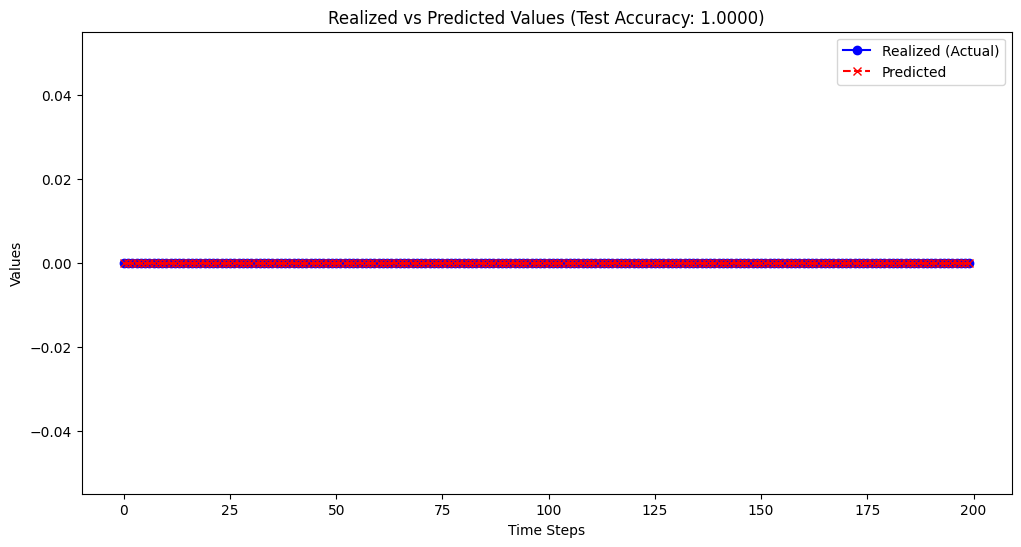

In [18]:
import matplotlib.pyplot as plt

# Create a plot
plt.figure(figsize=(12, 6))

# Plot realized (actual) values
plt.plot(range(len(rolling_targets)), rolling_targets, label="Realized (Actual)", color="blue", marker="o", linestyle="-")

# Plot predicted values
plt.plot(range(len(rolling_predictions)), rolling_predictions, label="Predicted", color="red", marker="x", linestyle="--")

# Add labels, title, and legend
plt.xlabel("Time Steps")
plt.ylabel("Values")
plt.title(f"Realized vs Predicted Values (Test Accuracy: {test_accuracy:.4f})")
plt.legend()

# Show the plot
plt.show()

import time
import numpy as np

for lr in np.arange(0.01, 0.11, 0.01):
    learning_rate = lr
    if model_type == "gru":
        from _12_nn_models.gru import train_model, evaluate_model
        start_time = time.time()
        train_accuracy = train_model(model, optimizer, num_epochs, trainloader, criterion, device)
        test_accuracy = evaluate_model(model, testloader, criterion, device)

        end_time = time.time()    
        execution_time = end_time - start_time

    store_results(
        results_filepath,
        horizontal_filename,
        stock,
        data_type,
        start_date,
        end_date,
        scaling_method,
        processing_method,
        window_size,
        model_type,
        batch_size,
        learning_rate,
        num_epochs,
        execution_time,
        num_layers,
        str(criterion),
        str(optimizer).split('\n')[0].strip(' ('),
        dropout,  # Example of additional model parameter
        train_accuracy,
        test_accuracy
    )

## **3. Store results**

This part of the code structures the process of saving results in a dataframe. At the moment, standardized for:

    - Objective: generate columns appropiately

In [19]:
results_dir = os.path.join(project_dir, "results")

if evaluation_metric == "rolling":
    results_filepath = os.path.join(results_dir, "results_rolling.csv")
else:
    results_filepath = os.path.join(results_dir, "results.csv")

In [20]:
def store_results(
    output_filepath,  # Path to save or update the CSV file
    data_filepath,    # Path to the data file
    stock,            # Stock(s)
    data_type,        # Type of data (Technical/Economic/Options)
    start_date,       # Start date
    end_date,         # End date
    scaling_method,   # Scaling method (standard/minmax/none)
    processing_method,  # Processing method (PCA/none)
    window_size,      # Window size
    model_name,       # Model name
    batch_size,
    learning_rate,    # Learning rate
    num_epochs,       # Number of epochs
    execution_time,   # Execution time (seconds)
    num_layers,       # Number of layers
    criterion,
    optimizer,
    dropout_rate,
    train_accuracy,
    test_accuracy,
    **kwargs          # Additional model parameters (optional)
):
    """
    Appends results with data and model parameters to a CSV file.

    """
    # Organize all data-related columns
    data_params = {
        "Data Filepath": data_filepath,
        "Stock(s)": stock,
        "Data Type": data_type,
        "Start-End Date (Values)": f"{start_date} - {end_date}",
        "Scaling Method": scaling_method,
        "Processing Method": processing_method,
        "Window Size": window_size
    }

    # Organize all model-related columns
    model_params = {
        "Model": model_name,
        "Date Performed": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Batch Size": batch_size,
        "Learning Rate": learning_rate,
        "Num Epochs": num_epochs,
        "Execution Time (s)": execution_time,
        "Number of Layers": num_layers,
        "Criterion" : criterion,
        "Optimizer" : optimizer,
        "Dropout Rate" : dropout_rate
    }
    
    result_params = {
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy
    }

    # Merge additional model parameters passed as kwargs
    model_params.update(kwargs)

    # Combine data and model parameters into one row
    result_row = {**data_params, **model_params, **result_params}

    # Load existing results or create a new DataFrame
    if os.path.exists(output_filepath):
        results_df = pd.read_csv(output_filepath)
    else:
        results_df = pd.DataFrame(columns=result_row.keys())

    # Append the new row using pd.concat
    new_row_df = pd.DataFrame([result_row])  # Create a DataFrame from the new row
    results_df = pd.concat([results_df, new_row_df], ignore_index=True)

    # Save back to the CSV
    results_df.to_csv(output_filepath, index=False)
    print(f"Results stored successfully in: {output_filepath}")

In [21]:
store_results(
        results_filepath,
        horizontal_filename,
        stock,
        data_type,
        start_date,
        end_date,
        scaling_method,
        processing_method,
        window_size,
        model_type,
        batch_size,
        learning_rate,
        num_epochs,
        execution_time,
        num_layers,
        str(criterion),
        str(optimizer).split('\n')[0].strip(' ('),
        dropout,  # Example of additional model parameter
        train_accuracy,
        test_accuracy
    )

Results stored successfully in: /home/jupyter-tfg2425paula/prediction_project_v2/results/results_rolling.csv
